# 군집 (Clustering)

## K-평균 활용

### 이미지 분할

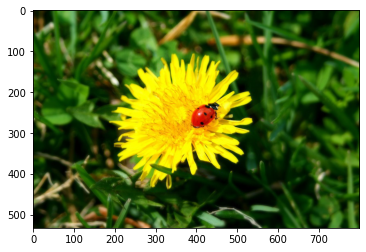

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = plt.imread('./images/ladybug.png')
plt.imshow(image)

In [4]:
image.shape

(533, 800, 3)

In [5]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [6]:
533*800

426400

In [9]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

KMeans(random_state=42)

In [11]:
kmeans.labels_ # 군집된 레이블

array([1, 1, 1, ..., 4, 1, 1], dtype=int32)

In [14]:
import numpy as np
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [15]:
kmeans.labels_.shape

(426400,)

In [16]:
kmeans.cluster_centers_ # 8개의 그룹의 센터 : 각각의 그룹을 대표할 수 있는 RBG 조합

array([[0.98364216, 0.9359353 , 0.02574798],
       [0.02286464, 0.1107755 , 0.00577724],
       [0.21914873, 0.38675722, 0.05800801],
       [0.7576767 , 0.2122922 , 0.04460662],
       [0.09998584, 0.25428283, 0.01694912],
       [0.6126595 , 0.6301019 , 0.3875087 ],
       [0.37211913, 0.52359784, 0.15730184],
       [0.8845901 , 0.7256055 , 0.03442024]], dtype=float32)

In [17]:
# 각 그룹의 대표되는 RGB 값으로 426400개의 픽셀을 대체
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # 426400개의 index가 사용

In [18]:
segmented_img.shape

(426400, 3)

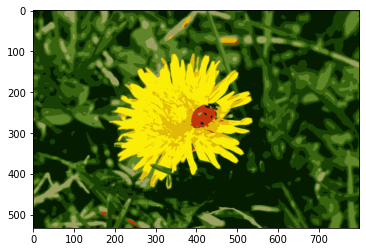

In [19]:
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [20]:
segmented_imgs = []
n_colors= [10, 8, 6, 4, 2]
for clusters in n_colors:
  kmeans = KMeans(n_clusters=clusters, random_state=42)
  kmeans.fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_img = segmented_img.reshape(image.shape)
  segmented_imgs.append(segmented_img)

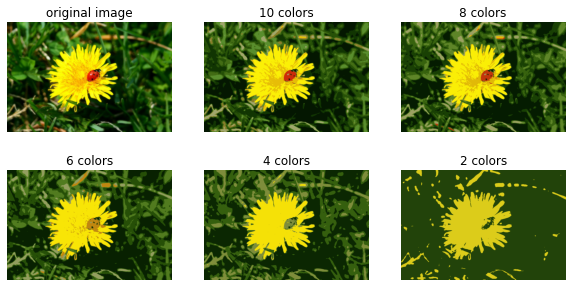

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.imshow(image)
plt.title('original image')
plt.axis('off')


for idx, n_clusters in enumerate(n_colors):
  plt.subplot(232+idx) # axis 지정
  plt.imshow(segmented_imgs[idx])
  plt.title('{} colors'.format(n_clusters))
  plt.axis('off')
